In [29]:
import os

import seaborn as sns
import pandas as pd
import numpy as np
import scanpy as sc
import altair as alt
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [2]:
squam_genes = pd.read_csv('../data/cibersortx/gene_list.txt', sep='\t', header=None)
squam_genes = squam_genes[0].to_list()
len(squam_genes), squam_genes[:5]

(100, ['S100A11', 'S100A2', 'LY6D', 'SPRR3', 'CRABP2'])

###### moffit comparison

In [ ]:
expression = pd.read_csv('../data/cibersortx/results/11142020/CIBERSORTx_3class_moffit_output/CIBERSORTxHiRes_Job4_malignant_basal_Window12.txt',
                        sep='\t', index_col='GeneSymbol')
expression = expression[~np.isnan(expression.iloc[:, 0])]
expression = expression.transpose()

expression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
normalized = StandardScaler().fit_transform(expression.values)
scores = np.sum(normalized, axis=1).flatten()

score_df = pd.DataFrame.from_dict({
    'sample_id': expression.index.to_list(),
    'score': scores
})
score_df = score_df.set_index('sample_id')
score_df

In [93]:
score_df

,monocyte_1,malignant_classical,monocyte_2,myCAF,iCAF,mast,b_cell,nk,DC,malignant_squamous_like,...,endothelial,plasma,epithelial,endocrine,erythrocyte_1,myocyte,acinar,P-value,Correlation,RMSE
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM1844105,0.000000,0.024681,0.127378,0.018553,0.019546,0.016220,0.528761,0.000000,0.025409,0.005893,...,0.071915,0.008139,0.002578,0.000000,0.000000,0.000000,0.030508,9999.0,0.605054,0.838323
GSM1844106,0.009713,0.156551,0.237025,0.158228,0.029047,0.011388,0.077413,0.025007,0.044679,0.107301,...,0.020769,0.004580,0.075925,0.000147,0.000000,0.000000,0.010839,9999.0,0.674508,0.771043
GSM1844107,0.010906,0.204488,0.182734,0.080586,0.023770,0.001485,0.090197,0.032221,0.079039,0.070614,...,0.044833,0.002423,0.031352,0.001709,0.061292,0.002714,0.005308,9999.0,0.613380,0.808376
GSM1844108,0.023066,0.211721,0.137997,0.075918,0.018205,0.000000,0.184364,0.046873,0.155421,0.043693,...,0.033303,0.003253,0.002947,0.000000,0.000000,0.000000,0.011925,9999.0,0.548511,0.853725
GSM1844109,0.000000,0.021219,0.009031,0.004669,0.024703,0.032698,0.082505,0.007973,0.646690,0.006447,...,0.039933,0.000000,0.008398,0.028726,0.000000,0.000067,0.005556,9999.0,0.713863,0.742948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1844245,0.059706,0.044226,0.143575,0.109228,0.098003,0.017101,0.154815,0.030725,0.061529,0.024052,...,0.102066,0.024646,0.012113,0.009803,0.029359,0.002873,0.009777,9999.0,0.568730,0.836039
GSM1844246,0.033882,0.053765,0.024961,0.108610,0.086032,0.039737,0.267195,0.014285,0.046486,0.053429,...,0.099410,0.002245,0.010271,0.006182,0.061986,0.005208,0.014820,9999.0,0.562513,0.837579
GSM1844247,0.005082,0.054559,0.023279,0.040100,0.030239,0.051667,0.277523,0.026423,0.186976,0.046901,...,0.082101,0.002889,0.013962,0.051448,0.000000,0.002311,0.005268,9999.0,0.505170,0.876524


In [94]:
## run this for cibersortx cell fraction instead
score_df = pd.read_csv('../results/cibersortx/run24_moffit_eus13/CIBERSORTx_Adjusted.txt', sep='\t')
# score_df = pd.read_csv('../results/cibersortx/run26_moffit_eus13_htan/CIBERSORTx_Adjusted.txt', sep='\t')
score_df = score_df.set_index('Mixture')
score_df.index.name = 'sample_id'
score_df = score_df[['malignant_squamous_like']]
score_df.columns = ['score']
score_df

,score
sample_id,
GSM1844105,0.005893
GSM1844106,0.107301
GSM1844107,0.070614
GSM1844108,0.043693
GSM1844109,0.006447
...,...
GSM1844245,0.024052
GSM1844246,0.053429
GSM1844247,0.046901


In [95]:
moffit_metadata = pd.read_csv('../data/bulk_rna_seq/moffit/metadata.tsv', sep='\t')
moffit_metadata = moffit_metadata.set_index('sample_id')
moffit_metadata.columns = ['source', 'cell line/tissue', 'death_event_1death_0censor', 'stroma', 'survival_time',
                           'tissue_type', 'tumor_subtype']

moffit_combined = pd.merge(score_df, moffit_metadata, left_index=True, right_index=True)
moffit_combined = moffit_combined[moffit_combined['survival_time'] > 0]
moffit_combined['status'] = [int(x) + 1 for x in moffit_combined['death_event_1death_0censor']]
moffit_combined.index.name = 'sample_id'

moffit_combined.columns = [x.replace(' ', '_') for x in moffit_combined.columns]

moffit_combined

,score,source,cell_line/tissue,death_event_1death_0censor,stroma,survival_time,tissue_type,tumor_subtype,status
sample_id,,,,,,,,,
GSM1844112,0.155163,Pancreas_Primary,Pancreas,1.0,1,7.0,Primary,2,2
GSM1844113,0.050711,Pancreas_Primary,Pancreas,1.0,3,11.0,Primary,2,2
GSM1844114,0.027513,Pancreas_Primary,Pancreas,0.0,2,47.0,Primary,1,1
GSM1844115,0.032426,Pancreas_Primary,Pancreas,1.0,3,10.0,Primary,1,2
GSM1844116,0.034014,Pancreas_Primary,Pancreas,1.0,3,1.0,Primary,1,2
...,...,...,...,...,...,...,...,...,...
GSM1844238,0.072667,Pancreas_Primary,Pancreas,1.0,3,17.0,Primary,1,2
GSM1844239,0.018468,Pancreas_Primary,Pancreas,0.0,3,1.0,Primary,1,1
GSM1844240,0.047281,Pancreas_Primary,Pancreas,1.0,2,20.0,Primary,1,2


###### bailey comparison

In [3]:
expression = pd.read_csv('../data/cibersortx/results/11142020/CIBERSORTx_3class_bailey_output/CIBERSORTxHiRes_Job3_malignant_basal_Window12.txt',
                        sep='\t', index_col='GeneSymbol')
expression = expression[~np.isnan(expression.iloc[:, 0])]
expression = expression.transpose()

expression

GeneSymbol,ADIRF,AHNAK2,ALDH1L1,AP2S1,AP3M2,AQP3,ARPC2,ATOX1,BZW1,C7orf50,...,SPRR1B,SPRR3,STRAP,TCEAL4,TFPT,TMEM40,TOMM7,TPD52L2,TPI1,TSPAN6
SA518851,1.897273,805.607289,69.170366,110.875005,26.301557,125.656644,342.633286,24.780192,453.73023,55.495238,...,22.442580,21.716193,132.949874,65.530319,17.035610,8.230579,88.137529,152.448870,728.817397,40.536106
SA528771,2.032808,805.607289,76.014301,90.057427,26.301557,95.496431,342.633286,19.728032,453.73023,42.417142,...,4.269398,20.516718,112.385012,65.530319,16.757757,2.887698,18.290625,134.175686,728.817397,40.536106
SA528766,5.373249,805.607289,72.634016,89.905668,26.301557,122.084614,342.633286,25.119110,453.73023,42.340381,...,6.285845,20.490002,114.656178,65.530319,16.630730,7.696793,14.171027,138.705248,728.817397,40.536106
SA528763,1.684821,805.607289,67.859949,91.144121,26.301557,93.380515,342.633286,27.262595,453.73023,44.480473,...,9.216867,20.767246,114.284697,65.530319,17.162129,3.519829,13.853623,136.436245,728.817397,40.536106
SA518817,2.034604,805.607289,68.400191,106.816096,26.301557,97.577730,342.633286,25.860314,453.73023,40.170739,...,4.269398,20.455377,112.199017,65.530319,16.065471,1.365347,77.738330,139.192154,728.817397,40.536106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA411430,1.954004,805.607289,68.113453,110.523650,26.301557,103.582730,342.633286,22.166714,453.73023,48.856851,...,7.626843,20.485759,111.242990,65.530319,18.508185,1.510115,136.597732,150.633628,728.817397,40.536106
SA411406,2.989878,805.607289,71.887276,92.151507,26.301557,94.996151,342.633286,23.532815,453.73023,50.015571,...,5.327448,20.511157,113.762915,65.530319,15.995411,1.334909,68.643569,135.455710,728.817397,40.536106
SA411923,1.817927,805.607289,102.319017,108.410101,26.301557,94.085800,342.633286,29.034347,453.73023,48.672218,...,20.080634,21.341062,121.666727,65.530319,18.500800,4.072469,44.625200,149.100120,728.817397,40.536106
SA411305,5.851030,805.607289,69.957246,109.382464,26.301557,93.465948,342.633286,21.734472,453.73023,43.623838,...,24.124272,79.712343,141.601476,65.530319,17.246372,5.107917,76.868192,156.176743,728.817397,40.536106


In [4]:
normalized = StandardScaler().fit_transform(expression.values)
scores = np.sum(normalized, axis=1).flatten()

score_df = pd.DataFrame.from_dict({
    'sample_id': expression.index.to_list(),
    'score': scores
})
score_df = score_df.set_index('sample_id')
score_df

,score
sample_id,
SA518851,29.811876
SA528771,-35.333723
SA528766,-19.443484
SA528763,-25.378630
SA518817,-25.896979
...,...
SA411430,-11.283223
SA411406,-28.766602
SA411923,50.288525


In [96]:
## run this for cibersortx cell fraction instead
score_df = pd.read_csv('../results/cibersortx/run24_bailey_eus13/CIBERSORTx_Adjusted.txt', sep='\t')
# score_df = pd.read_csv('../results/cibersortx/run26_bailey_eus13_htan/CIBERSORTx_Adjusted.txt', sep='\t')
score_df = score_df.set_index('Mixture')
score_df.index.name = 'sample_id'
score_df = score_df[['malignant_squamous_like']]
score_df.columns = ['score']
score_df

,score
sample_id,
SA518851,0.062448
SA528771,0.000000
SA528766,0.000000
SA528763,0.000000
SA518817,0.000000
...,...
SA411430,0.012881
SA411406,0.000000
SA411923,0.000000


In [11]:
expression.dropna(axis=1)

GeneSymbol,ADIRF,AHNAK2,ALDH1L1,AP2S1,AP3M2,AQP3,ARPC2,ATOX1,BZW1,C7orf50,...,SPRR1B,SPRR3,STRAP,TCEAL4,TFPT,TMEM40,TOMM7,TPD52L2,TPI1,TSPAN6
SA518851,1.897273,805.607289,69.170366,110.875005,26.301557,125.656644,342.633286,24.780192,453.73023,55.495238,...,22.442580,21.716193,132.949874,65.530319,17.035610,8.230579,88.137529,152.448870,728.817397,40.536106
SA528771,2.032808,805.607289,76.014301,90.057427,26.301557,95.496431,342.633286,19.728032,453.73023,42.417142,...,4.269398,20.516718,112.385012,65.530319,16.757757,2.887698,18.290625,134.175686,728.817397,40.536106
SA528766,5.373249,805.607289,72.634016,89.905668,26.301557,122.084614,342.633286,25.119110,453.73023,42.340381,...,6.285845,20.490002,114.656178,65.530319,16.630730,7.696793,14.171027,138.705248,728.817397,40.536106
SA528763,1.684821,805.607289,67.859949,91.144121,26.301557,93.380515,342.633286,27.262595,453.73023,44.480473,...,9.216867,20.767246,114.284697,65.530319,17.162129,3.519829,13.853623,136.436245,728.817397,40.536106
SA518817,2.034604,805.607289,68.400191,106.816096,26.301557,97.577730,342.633286,25.860314,453.73023,40.170739,...,4.269398,20.455377,112.199017,65.530319,16.065471,1.365347,77.738330,139.192154,728.817397,40.536106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA411430,1.954004,805.607289,68.113453,110.523650,26.301557,103.582730,342.633286,22.166714,453.73023,48.856851,...,7.626843,20.485759,111.242990,65.530319,18.508185,1.510115,136.597732,150.633628,728.817397,40.536106
SA411406,2.989878,805.607289,71.887276,92.151507,26.301557,94.996151,342.633286,23.532815,453.73023,50.015571,...,5.327448,20.511157,113.762915,65.530319,15.995411,1.334909,68.643569,135.455710,728.817397,40.536106
SA411923,1.817927,805.607289,102.319017,108.410101,26.301557,94.085800,342.633286,29.034347,453.73023,48.672218,...,20.080634,21.341062,121.666727,65.530319,18.500800,4.072469,44.625200,149.100120,728.817397,40.536106
SA411305,5.851030,805.607289,69.957246,109.382464,26.301557,93.465948,342.633286,21.734472,453.73023,43.623838,...,24.124272,79.712343,141.601476,65.530319,17.246372,5.107917,76.868192,156.176743,728.817397,40.536106


In [23]:
np.isnan(adata.X).any(axis=0)

array([False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False])

In [27]:
df = expression.dropna(axis=1)
adata = anndata.AnnData(X=df.values)
adata.obs.index = df.index.to_list()
adata.var.index = df.columns

sc.pp.scale(adata)

mask = ~np.isnan(adata.X).any(axis=0)
adata = adata[:, mask]

sc.pp.pca(adata, n_comps=10)
sc.pp.neighbors(adata, )
sc.tl.umap(adata)
sc.tl.leiden(adata)
adata

/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:748: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(var)


AnnData object with n_obs × n_vars = 92 × 73
    obs: 'leiden'
    var: 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [97]:
bailey_metadata = pd.read_csv('../data/bulk_rna_seq/bailey/metadata.tsv', sep='\t')
bailey_metadata = bailey_metadata.set_index('icgc_sample_id')

bailey_combined = pd.merge(score_df, bailey_metadata, left_index=True, right_index=True)

## exclude nans
mask = [not pd.isnull(x) for x in bailey_combined['donor_vital_status']]
bailey_combined = bailey_combined[mask]

bailey_combined['survival_time'] = [int(x / 30) if not pd.isnull(x) else x
                                    for x in bailey_combined['donor_survival_time']]
bailey_combined = bailey_combined[bailey_combined['survival_time'] > 0]
bailey_combined['status'] = [1 if vs == 'alive' else 2 for vs in bailey_combined['donor_vital_status']]

bailey_combined.index.name = 'sample_id'

bailey_combined.columns = [x.replace(' ', '_') for x in bailey_combined.columns]

bailey_combined

,score,project_code_x,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id,submitted_donor_id_x,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,...,donor_tumour_staging_system_at_diagnosis,donor_tumour_stage_at_diagnosis,donor_tumour_stage_at_diagnosis_supplemental,donor_survival_time,donor_interval_of_last_followup,prior_malignancy,cancer_type_prior_malignancy,cancer_history_first_degree_relative,survival_time,status
sample_id,,,,,,,,,,,,,,,,,,,,,
SA518851,0.062448,PACA-AU,8070200,SP108125,8070200,DO49204,ICGC_0543,NaN,NaN,NaN,...,TNM,NaN,NaN,156.0,156.0,unknown,NaN,unknown,5,2
SA528766,0.000000,PACA-AU,8069050,SP110832,8069050,DO49198,ICGC_0512,NaN,NaN,NaN,...,TNM,NaN,NaN,251.0,251.0,unknown,NaN,unknown,8,2
SA528763,0.000000,PACA-AU,8068990,SP110833,8068990,DO49199,ICGC_0513,NaN,NaN,NaN,...,TNM,NaN,NaN,1095.0,1095.0,unknown,NaN,unknown,36,2
SA518854,0.000000,PACA-AU,8070203,SP108071,8070203,DO49185,ICGC_0542,NaN,NaN,NaN,...,TNM,NaN,NaN,179.0,179.0,unknown,NaN,unknown,5,1
SA518806,0.000000,PACA-AU,8069444,SP108066,8069444,DO49183,ICGC_0521,NaN,NaN,NaN,...,TNM,NaN,NaN,429.0,429.0,unknown,NaN,unknown,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA411430,0.012881,PACA-AU,8044438,SP71982,8044438,DO33552,ICGC_0149,NaN,NaN,NaN,...,TNM,NaN,NaN,873.0,873.0,unknown,NaN,unknown,29,1
SA411406,0.000000,PACA-AU,8044426,SP71958,8044426,DO33544,ICGC_0153,NaN,NaN,NaN,...,TNM,NaN,NaN,412.0,412.0,unknown,NaN,unknown,13,2
SA411923,0.000000,PACA-AU,8058509,SP77059,8058509,DO34849,ICGC_0326,NaN,NaN,NaN,...,TNM,NaN,NaN,272.0,272.0,unknown,NaN,unknown,9,2


In [98]:
Counter(bailey_metadata[['percentage_cellularity', 'level_of_cellularity']]['level_of_cellularity'])

Counter({'61-80%': 35,
         nan: 232,
         '41-60%': 41,
         '1-20%': 20,
         '>81%': 31,
         '21-40%': 8})

In [99]:
sample_to_subtype_called_subtype = {}

# bailey 
bailey_metadata = pd.read_csv('../data/bulk_rna_seq/bailey/metadata.tsv', sep='\t')
bailey_subtypes = pd.read_excel('../data/bulk_rna_seq/bailey/41586_2016_BFnature16965_MOESM271_ESM.xlsx')

subtype_map = {
    1: 'ADEX',
    2: 'Immunogenic',
    3: 'Squamous',
    4: 'Pancreatic Progenitor'
}
bailey_subtypes['bailey_subtype'] = [subtype_map[s]
        for s in bailey_subtypes['membership.ordered']]
bailey_subtypes['subtype'] = ['basal' if st=='Squamous' else 'classical' for st in bailey_subtypes['bailey_subtype']]
bailey_subtypes

bailey_metadata = bailey_metadata[[True if s in bailey_combined.index else False
                                   for s in bailey_metadata['icgc_sample_id']]]

a = set(bailey_subtypes['icgc_id'])
b = set(bailey_metadata['submitted_donor_id_x'])
both = sorted(a.intersection(b))
len(a), len(b), len(a.intersection(b))

donor_to_sample_id = {k:v
        for k, v in zip(bailey_metadata['submitted_donor_id_x'], bailey_metadata['icgc_sample_id'])}
sample_to_subtype_called_subtype.update({donor_to_sample_id[s]:st
            for s, st in zip(bailey_subtypes['icgc_id'], bailey_subtypes['bailey_subtype'])
            if s in donor_to_sample_id})
sample_to_subtype_called_subtype

bailey_combined['bailey_subtype'] = [sample_to_subtype_called_subtype.get(s) for s in bailey_combined.index]
bailey_combined


,score,project_code_x,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id,submitted_donor_id_x,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,...,donor_tumour_stage_at_diagnosis,donor_tumour_stage_at_diagnosis_supplemental,donor_survival_time,donor_interval_of_last_followup,prior_malignancy,cancer_type_prior_malignancy,cancer_history_first_degree_relative,survival_time,status,bailey_subtype
sample_id,,,,,,,,,,,,,,,,,,,,,
SA518851,0.062448,PACA-AU,8070200,SP108125,8070200,DO49204,ICGC_0543,NaN,NaN,NaN,...,NaN,NaN,156.0,156.0,unknown,NaN,unknown,5,2,Squamous
SA528766,0.000000,PACA-AU,8069050,SP110832,8069050,DO49198,ICGC_0512,NaN,NaN,NaN,...,NaN,NaN,251.0,251.0,unknown,NaN,unknown,8,2,None
SA528763,0.000000,PACA-AU,8068990,SP110833,8068990,DO49199,ICGC_0513,NaN,NaN,NaN,...,NaN,NaN,1095.0,1095.0,unknown,NaN,unknown,36,2,None
SA518854,0.000000,PACA-AU,8070203,SP108071,8070203,DO49185,ICGC_0542,NaN,NaN,NaN,...,NaN,NaN,179.0,179.0,unknown,NaN,unknown,5,1,None
SA518806,0.000000,PACA-AU,8069444,SP108066,8069444,DO49183,ICGC_0521,NaN,NaN,NaN,...,NaN,NaN,429.0,429.0,unknown,NaN,unknown,14,2,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA411430,0.012881,PACA-AU,8044438,SP71982,8044438,DO33552,ICGC_0149,NaN,NaN,NaN,...,NaN,NaN,873.0,873.0,unknown,NaN,unknown,29,1,Immunogenic
SA411406,0.000000,PACA-AU,8044426,SP71958,8044426,DO33544,ICGC_0153,NaN,NaN,NaN,...,NaN,NaN,412.0,412.0,unknown,NaN,unknown,13,2,Immunogenic
SA411923,0.000000,PACA-AU,8058509,SP77059,8058509,DO34849,ICGC_0326,NaN,NaN,NaN,...,NaN,NaN,272.0,272.0,unknown,NaN,unknown,9,2,Squamous


###### tcga comparison

In [ ]:
expression = pd.read_csv('../data/cibersortx/results/11142020/CIBERSORTx_3class_tcga_output/CIBERSORTxHiRes_Job2_malignant_basal_Window12.txt',
                        sep='\t', index_col='GeneSymbol')
expression = expression[~np.isnan(expression.iloc[:, 0])]
expression = expression.transpose()

expression

In [ ]:
normalized = StandardScaler().fit_transform(expression.values)
scores = np.sum(normalized, axis=1).flatten()

score_df = pd.DataFrame.from_dict({
    'sample_id': expression.index.to_list(),
    'score': scores
})
score_df = score_df.set_index('sample_id')
score_df

In [ ]:
score_df = score_df.loc[[s for s in score_df.index if '-11A' not in s]]
score_df.index = [x[:12] for x in score_df.index]
score_df

In [46]:
## run this for cibersortx cell fraction instead
score_df = pd.read_csv('../results/cibersortx/run24_tcga_eus13/CIBERSORTx_Adjusted.txt', sep='\t')
score_df = score_df.set_index('Mixture')
score_df.index = [x[:12] for x in score_df.index]
score_df.index.name = 'sample_id'
score_df = score_df[['malignant_squamous_like']]
score_df.columns = ['score']

score_df

,score
sample_id,
TCGA-OE-A75W,0.012158
TCGA-2J-AABT,0.000000
TCGA-IB-7886,0.000000
TCGA-IB-AAUU,0.000000
TCGA-2J-AAB6,0.061545
...,...
TCGA-IB-AAUN,0.000000
TCGA-FB-AAPU,0.000000
TCGA-HZ-8001,0.000000


In [47]:
tcga_metadata = pd.read_csv('../data/bulk_rna_seq/tcga/tcga_2017_metadata.txt', sep='\t',
                           index_col='Tumor Sample ID')
# filter to only primary tumors
tcga_metadata = tcga_metadata[[True if not pd.isnull(s) and s[-3:-1]=='01' else False for s in tcga_metadata.index]]
tcga_metadata.index = [x[:12] for x in tcga_metadata.index]

keep = ['Purity Class (high or low)',
        'ABSOLUTE Purity',
       'mRNA Moffitt clusters (All 150 Samples) 1basal  2classical',
       'mRNA Collisson clusters (All 150 Samples) 1classical 2exocrine 3QM',
       'mRNA Bailey Clusters (All 150 Samples) 1squamous 2immunogenic 3progenitor 4ADEX',
        'Days to death', 'Follow up days',
        'Censored 1=yes 0=no',
       ]
tcga_metadata = tcga_metadata[keep]

def safe_int(x):
    if pd.isna(x): return 0
    if x == '--': return 0
    return int(x)

# # make a column for survival time
tcga_metadata['survival_time'] = [safe_int(dtd) if not pd.isnull(dtd) else safe_int(dtf) 
        for dtd, dtf in zip(tcga_metadata['Days to death'],
                           tcga_metadata['Follow up days'])]
tcga_metadata['survival_time'] = [int(x / 30) if not pd.isnull(x) else x
                                    for x in tcga_metadata['survival_time']]
tcga_metadata['status'] = [x+1 for x in tcga_metadata['Censored 1=yes 0=no']]

# print(tcga_metadata.columns)
tcga_metadata.columns = ['purity_status', 'ABSOLUTE_purity',
             'tcga_moffit_subtype', 'tcga_collison_subtype', 'tcga_bailey_subtype',
             'days_to_death', 'days_to_followup', 'censored', 'survival_time', 'status']

tcga_metadata = tcga_metadata[[c for c in tcga_metadata.columns
                               if c not in ['days_to_death', 'days_to_followup', 'censored']]]


# fix subtypes
d = {1:'basal', 2:'classical'}
tcga_metadata['tcga_moffit_subtype'] = [d[int(x)] for x in tcga_metadata['tcga_moffit_subtype']]
d = {1:'classical', 2:'exocrine', 3:'QM'}
tcga_metadata['tcga_collison_subtype'] = [d[int(x)] for x in tcga_metadata['tcga_collison_subtype']]
d = {1:'squamous', 2:'immunogenic', 3:'progenitor', 4:'ADEX'}
tcga_metadata['tcga_bailey_subtype'] = [d[int(x)] for x in tcga_metadata['tcga_bailey_subtype']]

tcga_metadata = tcga_metadata[tcga_metadata['survival_time'] > 0]
tcga_metadata = tcga_metadata[~pd.isnull(tcga_metadata['status'])]
tcga_combined = pd.merge(tcga_metadata, score_df, right_index=True, left_index=True)

tcga_combined

,purity_status,ABSOLUTE_purity,tcga_moffit_subtype,tcga_collison_subtype,tcga_bailey_subtype,survival_time,status,score
TCGA-2J-AAB1,high,0.38,classical,classical,progenitor,2,1.0,0.000000
TCGA-2J-AAB4,low,0.30,classical,classical,progenitor,24,2.0,0.000000
TCGA-2J-AAB6,high,0.54,basal,QM,squamous,9,1.0,0.061545
TCGA-2J-AAB8,low,0.27,classical,classical,progenitor,2,2.0,0.000000
TCGA-2J-AAB9,low,NaN,basal,exocrine,ADEX,20,1.0,0.000000
...,...,...,...,...,...,...,...,...
TCGA-XN-A8T5,low,0.09,basal,QM,immunogenic,24,2.0,0.000000
TCGA-YB-A89D,low,0.24,classical,classical,progenitor,11,2.0,0.000000
TCGA-YB-A89D,low,0.24,classical,classical,progenitor,11,2.0,0.000000
TCGA-YH-A8SY,low,0.22,basal,QM,squamous,12,2.0,0.032137


In [48]:
# ## make TCGA dataframe
# # tcga_clinical = pd.read_csv('../data/bulk_rna_seq/tcga/clinical.cases_selection.2020-05-01/clinical.tsv', sep='\t')
# # tcga_clinical = tcga_clinical.drop_duplicates('submitter_id')
# # tcga_clinical = tcga_clinical.set_index('submitter_id')

# # tcga_clinical.index.name = 'submitter_id'

# print(score_df.shape)
# ## drop normals
# to_drop = [x for x in score_df.index if '-11A-' in x]
# score_df = score_df.drop(to_drop, axis=0)

# ## limit to first part of id
# score_df.index = [x[:12] for x in score_df.index]
# print(score_df.shape)

# print('tcga clinical', tcga_clinical.shape)
# print(len(set(tcga_clinical.index).intersection(set(score_df.index))))

# tcga_combined = pd.merge(score_df, tcga_clinical, left_index=True, right_index=True)
# tcga_combined = tcga_combined.loc[~tcga_combined.index.duplicated(keep='first')]
# tcga_combined.index.name = 'sample_id'

# def safe_int(x):
#     if pd.isna(x): return 0.
#     if x == '--': return 0
#     return int(x)

# # # make a column for survival time
# tcga_combined['survival_time'] = [safe_int(dtd) if vs == 'Dead' else safe_int(dtf) 
#         for dtd, dtf, vs in zip(tcga_combined['days_to_death'],
#                            tcga_combined['days_to_last_follow_up'],
#                            tcga_combined['vital_status'])]
# tcga_combined['survival_time'] = [int((x / 365) * 12) if not pd.isnull(x) else x
#                                     for x in tcga_combined['survival_time']]
# ## get rid of zero survival times
# print(tcga_combined.shape)
# tcga_combined = tcga_combined[tcga_combined['survival_time'] > 0]
# print(tcga_combined.shape)

# tcga_combined['status'] = [1 if vs == 'Alive' else 2 for vs in tcga_combined['vital_status']]
# tcga_combined['morphology_numerical'] = [x[:-2] for x in tcga_combined['morphology']] 


# tcga_combined = tcga_combined[tcga_combined['primary_diagnosis'] != 'Neuroendocrine carcinoma, NOS']

# tcga_combined.columns = [x.replace(' ', '_') for x in tcga_combined.columns]


# # tcga_combined.to_csv('../results/survival/eus13_reclustered/tcga.tsv', sep='\t', header=True, index=True)


# tcga_combined

In [41]:
np.count_nonzero(pd.isnull(tcga_combined['status']))

0

###### grab everything

In [100]:
tcga_combined['dataset'] = 'tcga'
bailey_combined['dataset'] = 'bailey'
moffit_combined['dataset'] = 'moffit'

In [101]:
survival_times = [x for df in [bailey_combined, tcga_combined, moffit_combined]
       for x in df['survival_time']]
statuses = [x for df in [bailey_combined, tcga_combined, moffit_combined]
       for x in df['status']]
datasets = [x for df in [bailey_combined, tcga_combined, moffit_combined]
       for x in df['dataset']]
scores = [x for df in [bailey_combined, tcga_combined, moffit_combined]
       for x in df['score']]
indices = [x for df in [bailey_combined, tcga_combined, moffit_combined]
       for x in df.index]


clinical_df = pd.DataFrame.from_dict({
    'score': scores,
    'survival_time': survival_times,
    'status': statuses,
    'dataset': datasets
})
clinical_df.index = indices
clinical_df['sample_id'] = clinical_df.index.to_list()
clinical_df['survival_time'] = clinical_df['survival_time'].astype('Int64')

clinical_df

,score,survival_time,status,dataset,sample_id
SA518851,0.062448,5,2.0,bailey,SA518851
SA528766,0.000000,8,2.0,bailey,SA528766
SA528763,0.000000,36,2.0,bailey,SA528763
SA518854,0.000000,5,1.0,bailey,SA518854
SA518806,0.000000,14,2.0,bailey,SA518806
...,...,...,...,...,...
GSM1844238,0.072667,17,2.0,moffit,GSM1844238
GSM1844239,0.018468,1,1.0,moffit,GSM1844239
GSM1844240,0.047281,20,2.0,moffit,GSM1844240
GSM1844241,0.000000,2,2.0,moffit,GSM1844241


In [102]:
clinical_df = pd.merge(clinical_df,
         tcga_combined[['tcga_bailey_subtype', 'tcga_moffit_subtype', 'tcga_collison_subtype', 'purity_status']],
         right_index=True, left_index=True, how='outer')

clinical_df = pd.merge(clinical_df,
         bailey_combined[['bailey_subtype']],
         right_index=True, left_index=True, how='outer')


clinical_df.index.name = 'sample_id'
clinical_df

,score,survival_time,status,dataset,sample_id,tcga_bailey_subtype,tcga_moffit_subtype,tcga_collison_subtype,purity_status,bailey_subtype
sample_id,,,,,,,,,,
GSM1844112,0.155163,7,2.0,moffit,GSM1844112,NaN,NaN,NaN,NaN,NaN
GSM1844113,0.050711,11,2.0,moffit,GSM1844113,NaN,NaN,NaN,NaN,NaN
GSM1844114,0.027513,47,1.0,moffit,GSM1844114,NaN,NaN,NaN,NaN,NaN
GSM1844115,0.032426,10,2.0,moffit,GSM1844115,NaN,NaN,NaN,NaN,NaN
GSM1844116,0.034014,1,2.0,moffit,GSM1844116,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
TCGA-YB-A89D,0.000000,11,2.0,tcga,TCGA-YB-A89D,progenitor,classical,classical,low,NaN
TCGA-YB-A89D,0.000000,11,2.0,tcga,TCGA-YB-A89D,progenitor,classical,classical,low,NaN
TCGA-YB-A89D,0.000000,11,2.0,tcga,TCGA-YB-A89D,progenitor,classical,classical,low,NaN


In [103]:
t = clinical_df.copy()
t['sample_id'] = t.index.to_list()
t = t[['survival_time', 'sample_id', 'score', 'dataset']]
# exclude the weird bailey sample
# t = t.loc[[s for s in t.index if s != 'SA407858']]
# t = t[t['survival_time']<48]


chart = alt.Chart(t)
chart = chart.mark_circle().encode(
    x='survival_time',
    y='score',
    color='dataset',
    tooltip=['sample_id'],
)
# chart
c1 = chart + chart.transform_regression('survival_time', 'score', groupby=['dataset']).mark_line()
c1

alt.LayerChart(...)

In [74]:
def get_pvals(df, cuts, field):
    pvals = []
    for cut in cuts:
        l1, l2 = df[df[field]<cut], df[df[field]>=cut]
        results = logrank_test(l1['survival_time'], l2['survival_time'],
                               event_observed_A=l1['status'], event_observed_B=l2['status'])
        pvals.append(results.p_value)
    return pd.DataFrame.from_dict({
        'cutpoint': cuts,
        'p-value': pvals
    })

def marked_survival_chart(survival, field, interval=np.asarray(range(-100, 100, 2))):
    df = get_pvals(survival,
        interval, field)
    df[field] = df['cutpoint'].to_list()
    
    c1 = alt.Chart(df).mark_line().encode(
        y=field,
        x='p-value',
        order=field
    #     tooltip='p-value'
    )
    marks = alt.Chart(df).mark_circle().encode(
        y=field,
        x='p-value',
        tooltip=['p-value', field]
    )
    return c1 + marks

In [75]:
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter

In [76]:
t

,survival_time,sample_id,score,dataset
sample_id,,,,
GSM1844112,7,GSM1844112,0.155163,moffit
GSM1844113,11,GSM1844113,0.050711,moffit
GSM1844114,47,GSM1844114,0.027513,moffit
GSM1844115,10,GSM1844115,0.032426,moffit
GSM1844116,1,GSM1844116,0.034014,moffit
...,...,...,...,...
TCGA-YB-A89D,11,TCGA-YB-A89D,0.000000,tcga
TCGA-YB-A89D,11,TCGA-YB-A89D,0.000000,tcga
TCGA-YB-A89D,11,TCGA-YB-A89D,0.000000,tcga


In [77]:
t = clinical_df.copy()
t = t[t['dataset']=='bailey']
# t = t.loc[[s for s in t.index if s != 'SA411841']]
t = t[['survival_time', 'sample_id', 'score', 'dataset', 'status']]
c1 = marked_survival_chart(t, 'score', interval=np.asarray(range(0, 300, 1)) / 1000.)

c2 = alt.Chart(t).mark_circle().encode(
    y='score',
    x='survival_time',
    color='dataset',
    tooltip=['sample_id']
)
c2 = c2 + c2.transform_regression('survival_time', 'score', groupby=['dataset']).mark_line()


(c2 | c1).resolve_scale(y='shared')

alt.HConcatChart(...)

In [78]:
t = clinical_df.copy()
t = t[t['dataset']=='tcga']
# t = t.loc[[s for s in t.index if s != 'SA411841']]
t = t[['survival_time', 'sample_id', 'score', 'dataset', 'status']]

c1 = marked_survival_chart(t, 'score', interval=np.asarray(range(0, 300, 1)) / 1000.)

c2 = alt.Chart(t).mark_circle().encode(
    y='score',
    x='survival_time',
    color='dataset',
    tooltip=['sample_id']
)
c2 = c2 + c2.transform_regression('survival_time', 'score', groupby=['dataset']).mark_line()


(c2 | c1).resolve_scale(y='shared')

alt.HConcatChart(...)

In [79]:
t = clinical_df.copy()
t = t[t['dataset']=='moffit']
# t = t.loc[[s for s in t.index if s != 'SA411841']]
t = t[['survival_time', 'sample_id', 'score', 'dataset', 'status']]

c1 = marked_survival_chart(t, 'score', interval=np.asarray(range(0, 300, 1)) / 1000.)

c2 = alt.Chart(t).mark_circle().encode(
    y='score',
    x='survival_time',
    color='dataset',
    tooltip=['sample_id']
)
c2 = c2 + c2.transform_regression('survival_time', 'score', groupby=['dataset']).mark_line()


(c2 | c1).resolve_scale(y='shared')

alt.HConcatChart(...)

In [64]:
cut = .021
clinical_df['our_subtype'] = ['basal' if x >= cut else 'classical' for x in clinical_df['score']]
clinical_df

,score,survival_time,status,dataset,sample_id,tcga_bailey_subtype,tcga_moffit_subtype,tcga_collison_subtype,purity_status,bailey_subtype,our_subtype
sample_id,,,,,,,,,,,
SA407858,0.000000,62,2.0,bailey,SA407858,NaN,NaN,NaN,NaN,None,classical
SA408414,0.008750,23,2.0,bailey,SA408414,NaN,NaN,NaN,NaN,Squamous,classical
SA408530,0.083035,11,2.0,bailey,SA408530,NaN,NaN,NaN,NaN,Squamous,basal
SA408570,0.053149,8,2.0,bailey,SA408570,NaN,NaN,NaN,NaN,ADEX,basal
SA408758,0.002180,25,2.0,bailey,SA408758,NaN,NaN,NaN,NaN,ADEX,classical
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-YB-A89D,0.000000,11,2.0,tcga,TCGA-YB-A89D,progenitor,classical,classical,low,NaN,classical
TCGA-YB-A89D,0.000000,11,2.0,tcga,TCGA-YB-A89D,progenitor,classical,classical,low,NaN,classical
TCGA-YB-A89D,0.000000,11,2.0,tcga,TCGA-YB-A89D,progenitor,classical,classical,low,NaN,classical


In [65]:
import matplotlib.pyplot as plt

/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/lifelines/utils/__init__.py:1176: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/lifelines/utils/__init__.py:1176: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


0.0602291394032928

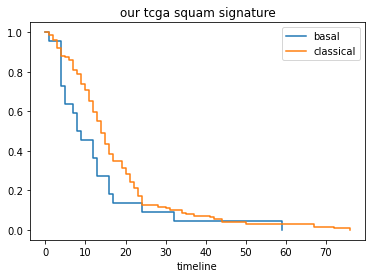

In [66]:
kmf = KaplanMeierFitter()
t = clinical_df[clinical_df['dataset']=='tcga'].copy()
t = t[['survival_time', 'sample_id', 'score', 'dataset', 'status', 'our_subtype']]
t['subtype'] = t['our_subtype'].to_list()

basal = t[t['subtype']=='basal']
kmf.fit(basal['survival_time'], basal['status'], label='basal')
ax = kmf.plot(show_censors=True, ci_show=False, )

classical = t[t['subtype']=='classical']
kmf.fit(classical['survival_time'], classical['status'], label='classical')
ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

results = logrank_test(basal['survival_time'], classical['survival_time'],
                               event_observed_A=basal['status'], event_observed_B=classical['status'])
plt.title('our tcga squam signature')
results.p_value

/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/lifelines/utils/__init__.py:1176: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/lifelines/utils/__init__.py:1176: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


0.0806636629321951

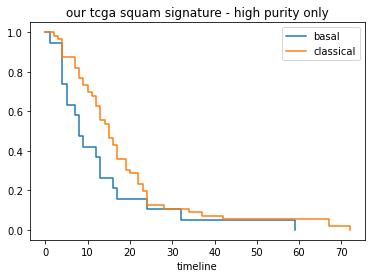

In [67]:
kmf = KaplanMeierFitter()
t = clinical_df[clinical_df['dataset']=='tcga'].copy()
t['subtype'] = t['our_subtype'].to_list()
t = t[t['purity_status']=='high']


basal = t[t['subtype']=='basal']
kmf.fit(basal['survival_time'], basal['status'], label='basal')
ax = kmf.plot(show_censors=True, ci_show=False, )

classical = t[t['subtype']=='classical']
kmf.fit(classical['survival_time'], classical['status'], label='classical')
ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

results = logrank_test(basal['survival_time'], classical['survival_time'],
                               event_observed_A=basal['status'], event_observed_B=classical['status'])
plt.title('our tcga squam signature - high purity only')
results.p_value

/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/lifelines/utils/__init__.py:1176: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/lifelines/utils/__init__.py:1176: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


0.2917967104806574

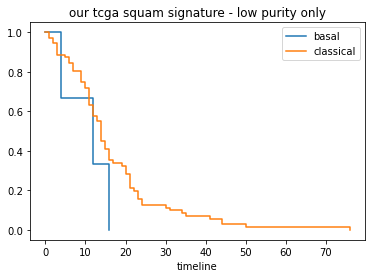

In [68]:
kmf = KaplanMeierFitter()
t = clinical_df[clinical_df['dataset']=='tcga'].copy()
t['subtype'] = t['our_subtype'].to_list()
t = t[t['purity_status']=='low']


basal = t[t['subtype']=='basal']
kmf.fit(basal['survival_time'], basal['status'], label='basal')
ax = kmf.plot(show_censors=True, ci_show=False, )

classical = t[t['subtype']=='classical']
kmf.fit(classical['survival_time'], classical['status'], label='classical')
ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

results = logrank_test(basal['survival_time'], classical['survival_time'],
                               event_observed_A=basal['status'], event_observed_B=classical['status'])
plt.title('our tcga squam signature - low purity only')
results.p_value

/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/lifelines/utils/__init__.py:1176: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/lifelines/utils/__init__.py:1176: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


0.07987592014395575

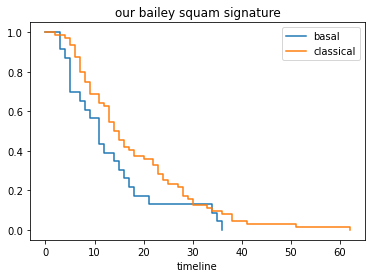

In [69]:
kmf = KaplanMeierFitter()
t = clinical_df[clinical_df['dataset']=='bailey'].copy()
t['subtype'] = t['our_subtype'].to_list()

basal = t[t['subtype']=='basal']
kmf.fit(basal['survival_time'], basal['status'], label='basal')
ax = kmf.plot(show_censors=True, ci_show=False, )

classical = t[t['subtype']=='classical']
kmf.fit(classical['survival_time'], classical['status'], label='classical')
ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

results = logrank_test(basal['survival_time'], classical['survival_time'],
                               event_observed_A=basal['status'], event_observed_B=classical['status'])
plt.title('our bailey squam signature')
results.p_value

In [ ]:
set(clinical_df['bailey_subtype'])

In [ ]:
kmf = KaplanMeierFitter()
t = clinical_df[clinical_df['dataset']=='bailey']
t['subtype'] = t['bailey_subtype'].to_list()

labels = sorted(set([x for x in t['subtype'] if not pd.isnull(x)]))

dfs = [t[t['subtype']==l] for l in labels]

label, df = labels[0], dfs[0]
kmf.fit(df['survival_time'], df['status'], label=label)
ax = kmf.plot(show_censors=True, ci_show=False, )

for label, df in zip(labels[1:], dfs[1:]):
    kmf.fit(df['survival_time'], df['status'], label=label)
    ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

plt.title('bailey paper subtypes')

squam, panc = dfs[-2], dfs[-1]
results = logrank_test(squam['survival_time'], panc['survival_time'],
                               event_observed_A=squam['status'], event_observed_B=panc['status'])
results.p_value

In [ ]:
clinical_df['tcga_bailey_subtype']

In [ ]:
kmf = KaplanMeierFitter()
t = clinical_df[clinical_df['dataset']=='tcga']
t['subtype'] = t['tcga_bailey_subtype'].to_list()

labels = sorted(set([x for x in t['subtype'] if not pd.isnull(x)]))

dfs = [t[t['subtype']==l] for l in labels]

label, df = labels[0], dfs[0]
kmf.fit(df['survival_time'], df['status'], label=label)
ax = kmf.plot(show_censors=True, ci_show=False, )

for label, df in zip(labels[1:], dfs[1:]):
    kmf.fit(df['survival_time'], df['status'], label=label)
    ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

plt.title('tcga bailey paper subtypes')

# squam, panc = dfs[-2], dfs[-1]
# results = logrank_test(squam['survival_time'], panc['survival_time'],
#                                event_observed_A=squam['status'], event_observed_B=panc['status'])
# results.p_value

In [ ]:
kmf = KaplanMeierFitter()
t = clinical_df[clinical_df['dataset']=='tcga']
t['subtype'] = t['tcga_moffit_subtype'].to_list()

labels = sorted(set([x for x in t['subtype'] if not pd.isnull(x)]))

dfs = [t[t['subtype']==l] for l in labels]

label, df = labels[0], dfs[0]
kmf.fit(df['survival_time'], df['status'], label=label)
ax = kmf.plot(show_censors=True, ci_show=False, )

for label, df in zip(labels[1:], dfs[1:]):
    kmf.fit(df['survival_time'], df['status'], label=label)
    ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

plt.title('moffit paper subtypes')

basal, classical = dfs[0], dfs[1]
results = logrank_test(basal['survival_time'], classical['survival_time'],
                               event_observed_A=basal['status'], event_observed_B=classical['status'])
results.p_value

In [ ]:
kmf = KaplanMeierFitter()
t = clinical_df[clinical_df['dataset']=='tcga']
t['subtype'] = t['tcga_moffit_subtype'].to_list()
t = t[t['purity_status']=='high']

labels = sorted(set([x for x in t['subtype'] if not pd.isnull(x)]))

dfs = [t[t['subtype']==l] for l in labels]

label, df = labels[0], dfs[0]
kmf.fit(df['survival_time'], df['status'], label=label)
ax = kmf.plot(show_censors=True, ci_show=False, )

for label, df in zip(labels[1:], dfs[1:]):
    kmf.fit(df['survival_time'], df['status'], label=label)
    ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

plt.title('moffit paper subtypes - high purity only')

basal, classical = dfs[0], dfs[1]
results = logrank_test(basal['survival_time'], classical['survival_time'],
                               event_observed_A=basal['status'], event_observed_B=classical['status'])
results.p_value

In [ ]:
kmf = KaplanMeierFitter()
t = clinical_df[clinical_df['dataset']=='tcga']
t['subtype'] = t['tcga_moffit_subtype'].to_list()
t = t[t['purity_status']=='low']

labels = sorted(set([x for x in t['subtype'] if not pd.isnull(x)]))

dfs = [t[t['subtype']==l] for l in labels]

label, df = labels[0], dfs[0]
kmf.fit(df['survival_time'], df['status'], label=label)
ax = kmf.plot(show_censors=True, ci_show=False, )

for label, df in zip(labels[1:], dfs[1:]):
    kmf.fit(df['survival_time'], df['status'], label=label)
    ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

plt.title('moffit paper subtypes - low purity only')

basal, classical = dfs[0], dfs[1]
results = logrank_test(basal['survival_time'], classical['survival_time'],
                               event_observed_A=basal['status'], event_observed_B=classical['status'])
results.p_value

In [ ]:
kmf = KaplanMeierFitter()
t = clinical_df[clinical_df['dataset']=='tcga']
t['subtype'] = t['tcga_collison_subtype'].to_list()

labels = sorted(set([x for x in t['subtype'] if not pd.isnull(x)]))

dfs = [t[t['subtype']==l] for l in labels]

label, df = labels[0], dfs[0]
kmf.fit(df['survival_time'], df['status'], label=label)
ax = kmf.plot(show_censors=True, ci_show=False, )

for label, df in zip(labels[1:], dfs[1:]):
    kmf.fit(df['survival_time'], df['status'], label=label)
    ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

plt.title('collison paper subtypes')

basal, classical = dfs[0], dfs[1]
results = logrank_test(basal['survival_time'], classical['survival_time'],
                               event_observed_A=basal['status'], event_observed_B=classical['status'])
results.p_value

In [ ]:
cut = 18
t = clinical_df[clinical_df['dataset']=='bailey'].copy()
t['subtype'] = ['basal' if s > cut else 'classical' for s in t['score']]

both = [s for s in bailey_subtypes.index if s in bailey_subtypes.index if s in t.index
     if bailey_subtypes.loc[s, 'subtype']=='basal' and t.loc[s, 'subtype']=='basal']
ours = [s for s in bailey_subtypes.index if s in t.index
     if bailey_subtypes.loc[s, 'subtype']!='basal' and t.loc[s, 'subtype']=='basal']
bailey = [s for s in bailey_subtypes.index if s in bailey_subtypes.index if s in t.index
     if bailey_subtypes.loc[s, 'subtype']=='basal' and t.loc[s, 'subtype']!='basal']
neither = [s for s in bailey_subtypes.index if s in bailey_subtypes.index if s in t.index
     if bailey_subtypes.loc[s, 'subtype']!='basal' and t.loc[s, 'subtype']!='basal']

def get_group(s):
    if s in both: return 'both'
    if s in ours: return 'ours'
    if s in bailey: return 'bailey'
    if s in neither: return 'neither'
t['group'] = [get_group(s) for s in t['sample_id']]
t

In [ ]:
c = alt.Chart(t).mark_boxplot().encode(
    x='group',
    y='survival_time',
    
)
c

In [ ]:
sns.violinplot(x='group', y='survival_time', data=t)

In [ ]:
sns.boxplot(x='tumor_subtype', y='score', data=moffit_combined)

In [ ]:
sns.scatterplot(x='survival_time', y='score', data=moffit_combined)

In [ ]:
moffit_combined['moffit_subtype'] = ['squamous-like' if s == 2 else 'non-squamous'
                                    for s in moffit_combined['tumor_subtype']]
moffit_combined